# clusterizacion


In [2]:
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW3.mat'
comentarios = [['chage (after random walk discharge)'],
               ['discharge (random walk)'],
               ['rest (random walk)']]
comentario_final = ['rest post random walk discharge']
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final)

final:  12826
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


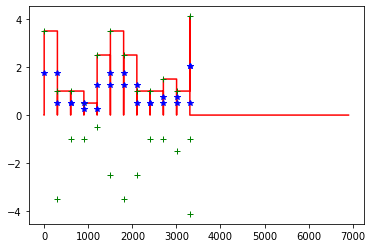

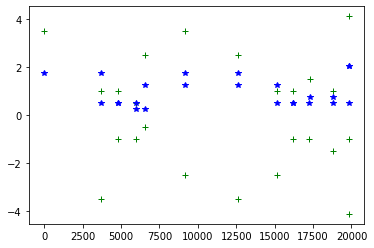

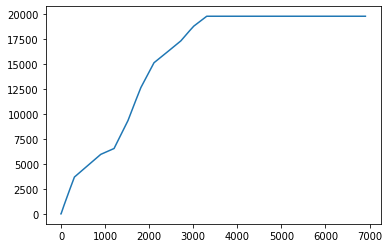

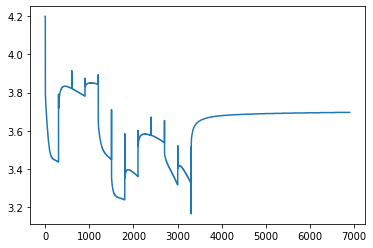

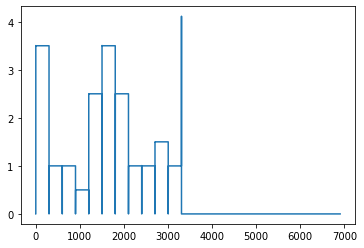

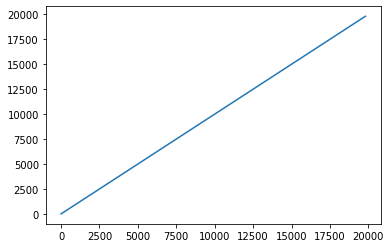

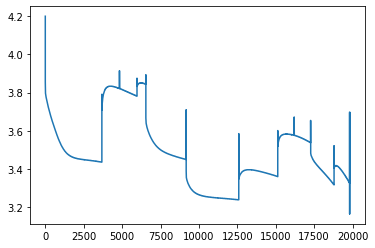

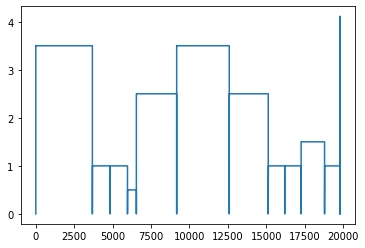

([<matplotlib.lines.Line2D at 0x7f068f55e438>], None)

In [7]:
# creacion de vectores de diferencia de consumo de corriente
centro_c = {}
t_real = {}
pot = {}
pot_real = {}
dif_c = {}
centro_real_c = {}
tiempo = {}

for i in c.keys():
    if i == 0: continue
    if i == len(c.keys()) - 1: break
    dif_c[i] = []
    centro_c[i] = []
    centro_real_c[i] = []
    t_real[i] = []
    pot[i] = []
    pot_real[i] = []
    tiempo[i] = []
    
    anterior = 0
    POT = 0
    t_anterior = t[i][0]
    aux_t = 0
    
    for idx, elem in enumerate(c[i]):
        dt = t[i][idx] - t_anterior
        t_anterior = t[i][idx]
        POT += c[i][idx] * v[i][idx] * dt
        aux_t += dt
        centro_c[i].append((elem + anterior) / 2)
        pot[i].append(POT)
        tiempo[i].append(aux_t)
        if (elem - anterior >= 0.3 or elem - anterior <= -0.3):
            if ((elem + anterior) / 2 > 4): continue
            dif_c[i].append(elem - anterior)
            pot_real[i].append(POT)
            centro_real_c[i].append((elem + anterior) / 2)
            t_real[i].append(aux_t)
        anterior = elem

plt.plot(tiempo[2], c[2], color='r')
plt.plot(t_real[2], dif_c[2], '+g')
plt.plot(t_real[2], centro_real_c[2], '*b'), plt.show()

plt.plot(pot_real[2], dif_c[2], '+g')
plt.plot(pot_real[2], centro_real_c[2], '*b'), plt.show()

plt.plot(tiempo[2], pot[2]), plt.show()
plt.plot(tiempo[2], v[2]), plt.show()
plt.plot(tiempo[2], c[2]), plt.show()

plt.plot(pot[2], pot[2]), plt.show()
plt.plot(pot[2], v[2]), plt.show()
plt.plot(pot[2], c[2]), plt.show()


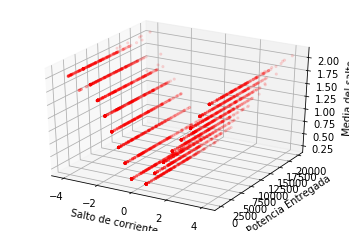

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for idx in t.keys():
    if idx == 0: continue
    if idx == 481: continue
    ax.scatter(dif_c[idx], pot_real[idx], centro_real_c[idx], marker='.', color='r', alpha=0.1)
#     plt.scatter(pot_real[idx], dif_c[idx], label='diferencia', s=68, edgecolors='r', alpha=0.4)
#     plt.scatter(pot_real[idx], centro_real_c[idx], label='centro', s=68, edgecolors='b', alpha=0.4)

ax.set_xlabel('Salto de corriente')
ax.set_ylabel('Potencia Entregada')
ax.set_zlabel('Media del salto')

plt.show()

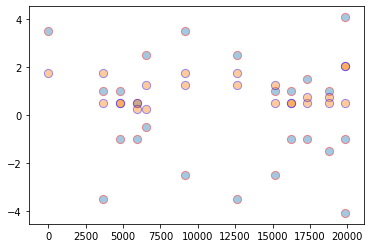

In [9]:
plt.scatter(pot_real[2], dif_c[2], label='diferencia', s=68, edgecolors='r', alpha=0.4)
plt.scatter(pot_real[2], centro_real_c[2], label='centro', s=68, edgecolors='b', alpha=0.4)

In [11]:
lista = [str('reference charge')]
final = [str('rest post reference charge')]
t_carga, v_carga, c_carga, temp_carga, T_carga = carga_de_datos(documento, lista, final, nofinal=True)

lista = [str('reference discharge')]
final = [str('rest post reference discharge')]
t_descarga, v_descarga, c_descarga, temp_descarga, T_descarga = carga_de_datos(documento, lista, final, nofinal=True)
print(len(t_descarga))

final:  12826
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
final:  12826
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
44


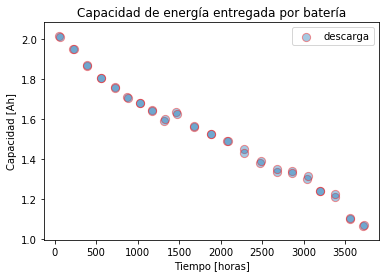

(Text(0.5, 1, 'Capacidad de energía entregada por batería'), None)

In [12]:
# integrar la descarga
energia_entregada = []
T = []
for k in t_descarga.keys():
    energia_entregada.append(sum(c_descarga[k]) / 360)
    T.append(np.min(t_descarga[k]) / 3600)
plt.scatter(T, energia_entregada, label='descarga', s=68, edgecolors='r', alpha=0.4)

# integrar la descarga
energia_entregada = []
T = []
for k in t_carga.keys():
    energia_entregada.append(sum(c_carga[k]) / 360)
    T.append(np.mean(t_carga[k]) / 3600)
# plt.scatter(T, np.abs(energia_entregada), label='carga', s=38, edgecolors='b', alpha=0.4)
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.legend()
plt.title('Capacidad de energía entregada por batería'), plt.show()

[ciclo, potencia, media y magnitud del salto] como identidad de un salto, a partir de ello obtener una respuesta dinamica con features